In [1]:
import tensorflow as tf
import numpy as np
import sys

In [2]:
class mymodel(tf.keras.Model):
    def __init__(self,vocab_size,emb_size,hidden, outputs):
        super(mymodel,self).__init__()
        
        self.emb = tf.keras.layers.Embedding(vocab_size, emb_size)
        self.hidden = tf.keras.layers.Dense(hidden, activation='relu')
        self.outputs = tf.keras.layers.Dense(outputs, activation='sigmoid')
        
    def call(self, inputs):
        
        x = self.emb(inputs)
        x = tf.reduce_mean(x, axis=1)
        x = self.hidden(x)
        x = self.outputs(x)
        
        return x
    
model_nlp = mymodel(21,128,32,1)

In [3]:
# model_nlp.compile(loss='binary_crossentropy', optimizer='adam', metrics='acc')

# checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = './best_model.h5',
#                                                save_best_only=True,
#                                                save_weight_only=True,
#                                                verbose=1)
# earlystop = tf.keras.callbacks.ModelCheckpoint(patience=5)

In [4]:
# mymodel_nlp.fit(X, y, epochs=100, batch_size=30, callbacks=[checkpoint, earlystop])

In [5]:
## Countvector, TfIdf

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [6]:
text_data = ['나는 배가 고프다', '내일 점심 뭐먹지']

In [7]:
count_vector = CountVectorizer()
count_vector.fit(text_data)
count_vector.vocabulary_
print(count_vector.vocabulary_)

tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(text_data)
tfidf_vector = tfidf_vectorizer.transform(text_data)
tfidf_vector.toarray()

{'나는': 1, '배가': 4, '고프다': 0, '내일': 2, '점심': 5, '뭐먹지': 3}


array([[0.57735027, 0.57735027, 0.        , 0.        , 0.57735027,
        0.        ],
       [0.        , 0.        , 0.57735027, 0.57735027, 0.        ,
        0.57735027]])

In [8]:
display(text_data)
print(count_vector.transform(text_data).toarray())

tdm_count = count_vector.transform(text_data).toarray()

['나는 배가 고프다', '내일 점심 뭐먹지']

[[1 1 0 0 1 0]
 [0 0 1 1 0 1]]


In [9]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [10]:
sentence = "Natural language processing (NLP) is a subfield of computer science \
information engineering, and artificial intelligence concerned \
with the interactions between computers and human (natural) languages, \
in particular how to program computers to process and analyze \
large amounts of natural language data."

word_token = word_tokenize(sentence)
print(sentence)

Natural language processing (NLP) is a subfield of computer science information engineering, and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.


In [11]:
from konlpy.tag import Okt
from konlpy.corpus import kolaw, kobill

In [12]:
okt = Okt()

In [13]:
text = "한글 자연어 처리는 재밌다 이제부터 열심히 공부해야지"

ko_nouns = okt.nouns(text)
ko_morphs = okt.morphs(text)
ko_morphs_stem = okt.morphs(text, stem=True)
ko_phrases = okt.phrases(text)
ko_pos = okt.pos(text)

In [14]:
import re

In [15]:
# import kaggle

In [16]:
# ! kaggle competitions list

In [17]:
# ! kaggle competitions download -c word2vec-nlp-tutorial

In [18]:
## SVD
A = np.array([[0,0,0,1,0,1,1,0,0],
              [0,0,0,1,1,0,1,0,0],
              [0,1,1,0,2,0,0,0,0],
              [1,0,0,0,0,0,0,1,1]])

print('DTM shape = ', A.shape)

DTM shape =  (4, 9)


In [19]:
U, s, VT = np.linalg.svd(A, full_matrices=True)

print('행렬 U =')
print(U)
print('행렬 s =')
print(s)
print('행렬 VT =')
print(VT)

행렬 U =
[[-2.39751712e-01  7.51083898e-01  9.90665210e-17 -6.15135834e-01]
 [-5.06077194e-01  4.44029376e-01 -1.48599782e-16  7.39407727e-01]
 [-8.28495619e-01 -4.88580485e-01 -4.39152715e-17 -2.73649629e-01]
 [-8.78352025e-17 -2.98807451e-17  1.00000000e+00  1.58797796e-16]]
행렬 s =
[2.68731789 2.04508425 1.73205081 0.77197992]
행렬 VT =
[[-9.81014381e-17 -3.08298331e-01 -3.08298331e-01 -2.77536539e-01
  -8.04917216e-01 -8.92159849e-02 -2.77536539e-01 -5.17165587e-17
  -5.17165587e-17]
 [ 2.80518551e-17 -2.38904821e-01 -2.38904821e-01  5.84383395e-01
  -2.60689306e-01  3.67263060e-01  5.84383395e-01 -4.00759068e-17
  -4.00759068e-17]
 [ 5.77350269e-01 -5.29524219e-17  4.64441477e-17  1.40359371e-16
  -1.57250863e-16  1.54532077e-16 -8.16852336e-17  5.77350269e-01
   5.77350269e-01]
 [ 2.23837277e-16 -3.54477649e-01 -3.54477649e-01  1.60978141e-01
   2.48851639e-01 -7.96828796e-01  1.60978141e-01 -5.94630665e-17
  -5.94630665e-17]
 [-1.11022302e-16 -7.79217669e-01 -1.33887309e-02 -1.981516

In [20]:
las_matrix = np.hstack([U[:, 0:1]*s[0],U[:,1:2]*s[1]])
print(las_matrix)

[[-6.44289063e-01  1.53602985e+00]
 [-1.35999029e+00  9.08077483e-01]
 [-2.22643109e+00 -9.99188254e-01]
 [-2.36041111e-16 -6.11086412e-17]]


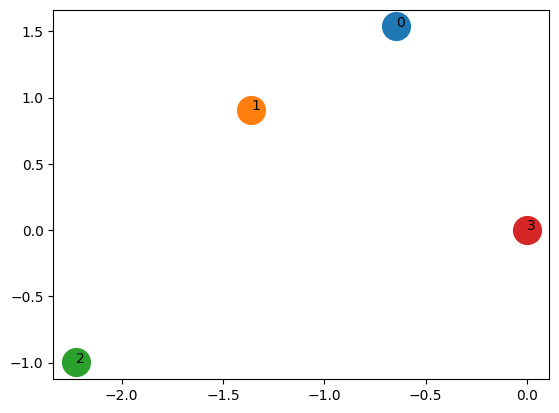

In [21]:
import matplotlib.pyplot as plt

for i in range(4):
    plt.plot(las_matrix[i,0], las_matrix[i,1], 'o', markersize= 20)
    plt.text(las_matrix[i,0], las_matrix[i,1], i)
    
plt.show()

In [22]:
sent = ("휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.", 
        "폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.") 

display(sent)

('휴일 인 오늘 도 서쪽 을 중심 으로 폭염 이 이어졌는데요, 내일 은 반가운 비 소식 이 있습니다.',
 '폭염 을 피해서 휴일 에 놀러왔다가 갑작스런 비 로 인해 망연자실 하고 있습니다.')

In [23]:
tfidf_vectorize = TfidfVectorizer()

tfidf_vectorize.fit(sent)
print(tfidf_vectorize.vocabulary_)

tfidf_vector = tfidf_vectorize.transform(sent)
print(tfidf_vector.toarray())

print('idf =',tfidf_vectorize.idf_)

print(tfidf_vectorize.get_feature_names_out())

{'휴일': 16, '오늘': 7, '서쪽': 5, '중심': 12, '으로': 8, '폭염': 13, '이어졌는데요': 9, '내일': 1, '반가운': 4, '소식': 6, '있습니다': 11, '피해서': 14, '놀러왔다가': 2, '갑작스런': 0, '인해': 10, '망연자실': 3, '하고': 15}
[[0.         0.32412345 0.         0.         0.32412345 0.32412345
  0.32412345 0.32412345 0.32412345 0.32412345 0.         0.2306165
  0.32412345 0.2306165  0.         0.         0.2306165 ]
 [0.36469323 0.         0.36469323 0.36469323 0.         0.
  0.         0.         0.         0.         0.36469323 0.25948224
  0.         0.25948224 0.36469323 0.36469323 0.25948224]]
idf = [1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511
 1.40546511 1.40546511 1.40546511 1.40546511 1.40546511 1.
 1.40546511 1.         1.40546511 1.40546511 1.        ]
['갑작스런' '내일' '놀러왔다가' '망연자실' '반가운' '서쪽' '소식' '오늘' '으로' '이어졌는데요' '인해' '있습니다'
 '중심' '폭염' '피해서' '하고' '휴일']


In [24]:
sent_vector = tfidf_vector.toarray()
len(sent_vector)
print(sent_vector[0])
print(sent_vector[1])

[0.         0.32412345 0.         0.         0.32412345 0.32412345
 0.32412345 0.32412345 0.32412345 0.32412345 0.         0.2306165
 0.32412345 0.2306165  0.         0.         0.2306165 ]
[0.36469323 0.         0.36469323 0.36469323 0.         0.
 0.         0.         0.         0.         0.36469323 0.25948224
 0.         0.25948224 0.36469323 0.36469323 0.25948224]


In [25]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

In [26]:
print(sent_vector[0])
print(sent_vector[0:1])

[0.         0.32412345 0.         0.         0.32412345 0.32412345
 0.32412345 0.32412345 0.32412345 0.32412345 0.         0.2306165
 0.32412345 0.2306165  0.         0.         0.2306165 ]
[[0.         0.32412345 0.         0.         0.32412345 0.32412345
  0.32412345 0.32412345 0.32412345 0.32412345 0.         0.2306165
  0.32412345 0.2306165  0.         0.         0.2306165 ]]


In [27]:
print('cosine distance = ',cosine_similarity(sent_vector[0:1],sent_vector[1:2]))
print('euclidean distance =', euclidean_distances(sent_vector[0:1],sent_vector[1:2]))

cosine distance =  [[0.17952266]]
euclidean distance = [[1.28099753]]


In [28]:
from tensorflow.keras import utils
import os
import pandas as pd

In [29]:
data_set = tf.keras.utils.get_file(
    fname = 'imdb.tar.gz',
    origin = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz",
    extract=True
)

In [30]:
# data_set ='C:/Users/82103/.keras/datasets/aclImdb/train/pos/0_0.txt'

# mytxt = np.loadtxt(data_set, dtype ='str', encoding ='utf-8', delimiter=':')
# print(mytxt)

In [31]:
import glob

fix_path = 'C:/Users/82103/.keras/datasets/aclImdb'
tt_lists = ['/train', '/test']
pn_lists = ['/pos/','/neg/']

data ={}
for i in tt_lists:
    for j in pn_lists:
        path = fix_path +i +j+"*.*"
        
        data[i+j] = []
        
        file_lists = glob.glob(path)
        
        for k in file_lists:
            with open(k,'rt', encoding='utf-8') as f:
                data[i+j].append(f.read())

In [32]:
data.keys()
len(data['/train/pos/'][0])

12500

In [35]:
data_train_pos = pd.DataFrame(data['/train/pos/'], columns =['review'])
data_train_pos['sentiment'] = 1

data_train_neg = pd.DataFrame(data['/train/neg/'], columns =['review'])
data_train_neg['sentiment'] = 0

train_df = pd.concat([data_train_pos, data_train_neg], axis=0)

train_df.head()
# train_df.shape

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [37]:
reviews = train_df['review']

print(type(reviews))
print(reviews.head())

<class 'pandas.core.series.Series'>
0    Bromwell High is a cartoon comedy. It ran at t...
1    Homelessness (or Houselessness as George Carli...
2    Brilliant over-acting by Lesley Ann Warren. Be...
3    This is easily the most underrated film inn th...
4    This is not the typical Mel Brooks film. It wa...
Name: review, dtype: object


In [38]:
tokenized_reviews = [r.split() for r in reviews]

In [43]:
print(len(tokenized_reviews[0]))
print(len(tokenized_reviews[1]))
# tokenized_reviews[0]

140
428


['Bromwell',
 'High',
 'is',
 'a',
 'cartoon',
 'comedy.',
 'It',
 'ran',
 'at',
 'the',
 'same',
 'time',
 'as',
 'some',
 'other',
 'programs',
 'about',
 'school',
 'life,',
 'such',
 'as',
 '"Teachers".',
 'My',
 '35',
 'years',
 'in',
 'the',
 'teaching',
 'profession',
 'lead',
 'me',
 'to',
 'believe',
 'that',
 'Bromwell',
 "High's",
 'satire',
 'is',
 'much',
 'closer',
 'to',
 'reality',
 'than',
 'is',
 '"Teachers".',
 'The',
 'scramble',
 'to',
 'survive',
 'financially,',
 'the',
 'insightful',
 'students',
 'who',
 'can',
 'see',
 'right',
 'through',
 'their',
 'pathetic',
 "teachers'",
 'pomp,',
 'the',
 'pettiness',
 'of',
 'the',
 'whole',
 'situation,',
 'all',
 'remind',
 'me',
 'of',
 'the',
 'schools',
 'I',
 'knew',
 'and',
 'their',
 'students.',
 'When',
 'I',
 'saw',
 'the',
 'episode',
 'in',
 'which',
 'a',
 'student',
 'repeatedly',
 'tried',
 'to',
 'burn',
 'down',
 'the',
 'school,',
 'I',
 'immediately',
 'recalled',
 '.........',
 'at',
 '..........',


In [44]:
tokenized_reviews_len = [len(t) for t in tokenized_reviews]
print('단어갯수 =', tokenized_reviews_len[:10])

tokenized_reviews_eumjeol = [len(e.replace(" ","")) for e in reviews]
print('음절갯수 =', tokenized_reviews_eumjeol[:10])

단어갯수 = [140, 428, 147, 124, 120, 171, 108, 340, 436, 324]
음절갯수 = [667, 1939, 695, 540, 528, 847, 521, 1845, 2170, 1537]


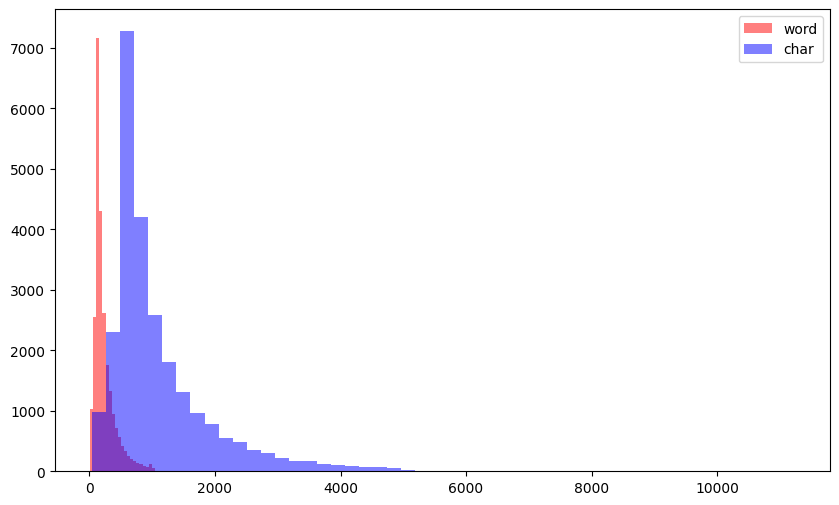

In [50]:
plt.figure(figsize = (10,6))

plt.hist(tokenized_reviews_len, bins = 50, color='r', alpha =0.5, label='word')
plt.hist(tokenized_reviews_eumjeol, bins = 50, color='b', alpha =0.5, label='char')
plt.legend()
plt.show()

In [54]:
def summary_token(x):
    print('문장의 최대 길이: {}'.format(np.max(x)))
    print('문장의 최소 길이: {}'.format(np.min(x)))
    print('문장의 평균 길이: {}'.format(np.mean(x)))
    print('문장의 중앙값의 길이: {}'.format(np.median(x)))
    print('문장의 1사분위 길이: {}'.format(np.percentile(x,25)))
    print('문장의 3사분위 길이: {}'.format(np.percentile(x,75)))
    
summary_token(tokenized_reviews_len)

문장의 최대 길이: 2470
문장의 최소 길이: 10
문장의 평균 길이: 233.7872
문장의 중앙값의 길이: 174.0
문장의 1사분위 길이: 127.0
문장의 3사분위 길이: 284.0


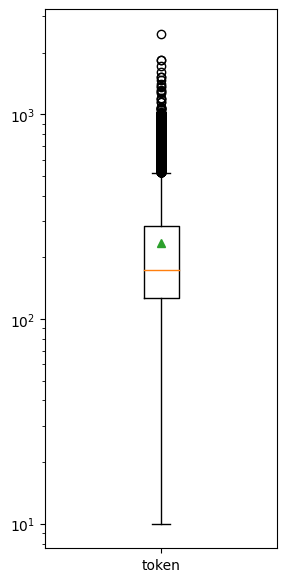

In [57]:
plt.figure(figsize=(3,7))

plt.boxplot(tokenized_reviews_len, labels=['token'], showmeans=True)
plt.yscale('log')

plt.show()

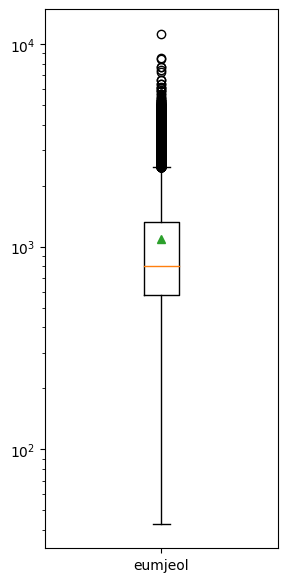

In [58]:
plt.figure(figsize=(3,7))

plt.boxplot(tokenized_reviews_eumjeol, labels=['eumjeol'], showmeans=True)
plt.yscale('log')

plt.show()

In [60]:
!pip install wordcloud

  Using cached wordcloud-1.8.2.2-cp38-cp38-win_amd64.whl (152 kB)


In [61]:
from wordcloud import WordCloud, STOPWORDS

In [91]:
# print(STOPWORDS)

MySTOPWORDS = list(STOPWORDS) + ['br','see','watch','movie','film','one','show','seen','scene','make','even','films','thing','plot',
                                'say','want','seem','will','made','still','take','way','end','movies','makes','really','look','think','know',
                                 'seems','people','life','little','many','going','give','find','come','scenes','watching','two','never',
                                'back','now','play','another','man','things','go','right','girl','got']
MySTOPWORDS = set(MySTOPWORDS)
# print(MySTOPWORDS)

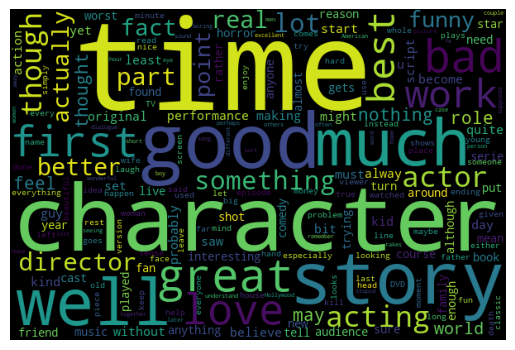

In [92]:
# print(type(STOPWORDS))

wordcloud = WordCloud(stopwords=MySTOPWORDS, width=600, height=400)
wordcloud.generate(" ".join(reviews))

plt.figure()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [81]:
import seaborn as sns

In [ ]:
sns.countplot(x='sentiment',data=train_df)
plt.show()